# Preprocessing 

In [1]:
# import relevant packages 
import glob 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data.dataset_utils import read_ns5_file

sns.set_theme()

### Before and After 

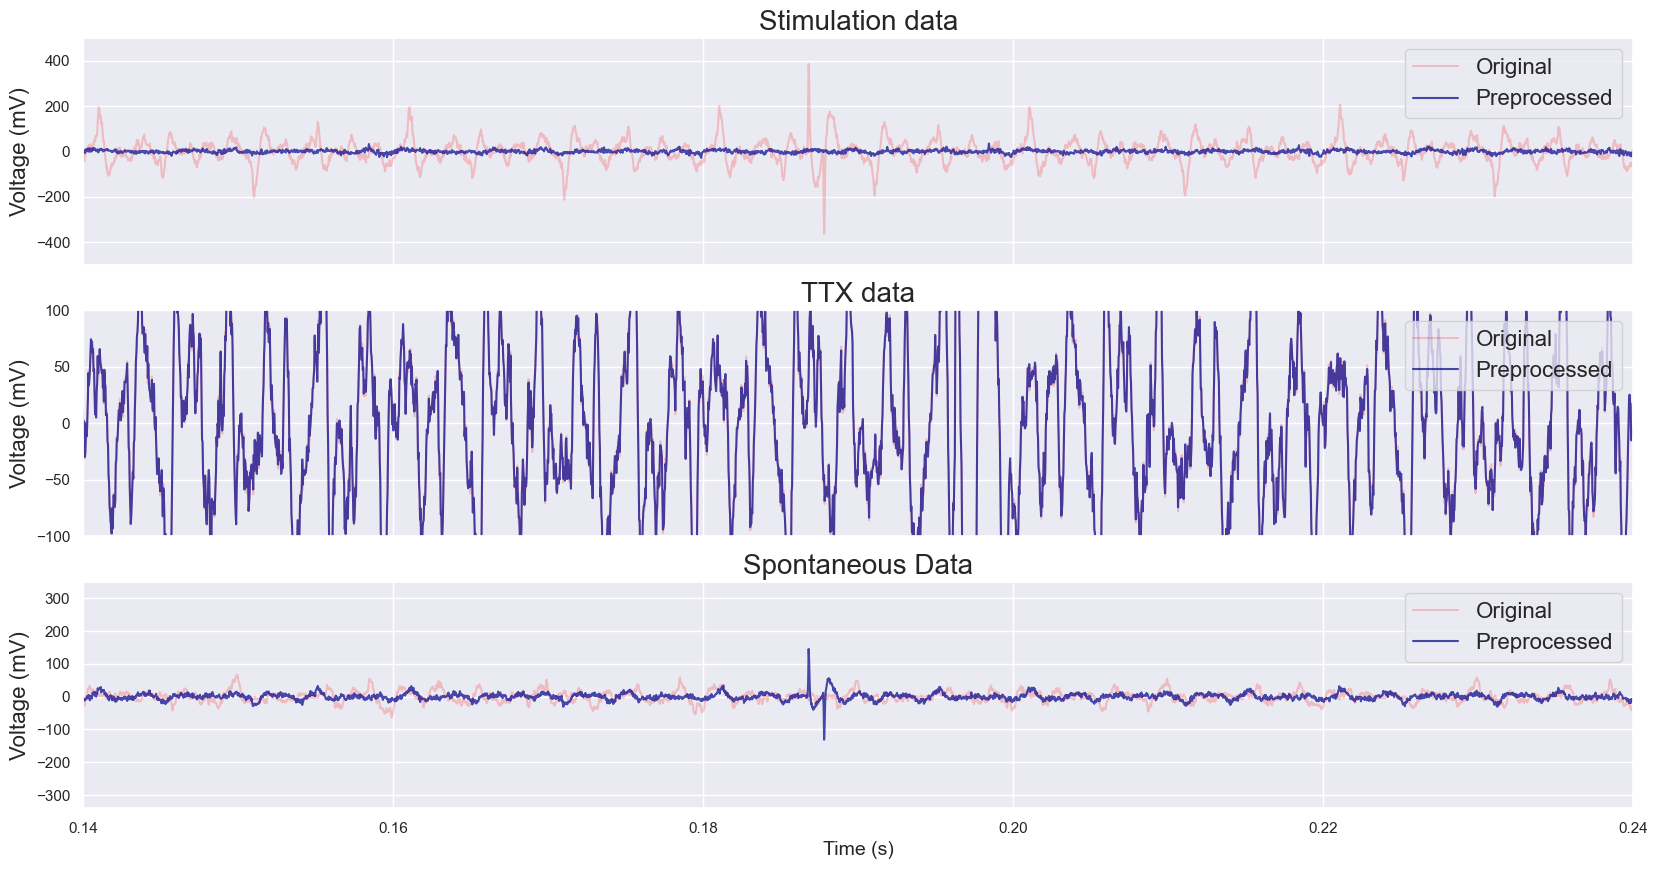

In [58]:
# before 
paths_before = glob.glob("../../data/raw/2D/Eye 4/*.ns5")
stim_before, ttx_before, spon_before = read_ns5_file(paths_before[0])[1], read_ns5_file(paths_before[1])[1], read_ns5_file(paths_before[2])[1]

# after 
paths_after = sorted(glob.glob("../../data/preprocessed/2D/Eye 4/*.npy"), key = len)
stim_after, ttx_after, spon_after = np.load(paths_after[1]), np.load(paths_after[0]), np.load(paths_after[2])

ttx_after = ttx_after[:300300]
ttx_before = ttx_before[:300300]

channel = 20
times = np.arange(0, len(stim_before)/30000, 1/30000)

# plot 
fig, ax = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
ax[0].plot(times, stim_before[:, channel], color = "red", alpha = 0.2)
ax[0].plot(times, stim_after[:, channel], color = "darkblue", alpha = 0.7)
ax[0].set_title("Stimulation data", fontdict = {"fontsize": 20})
ax[0].set_ylim([-500, 500])

ax[1].plot(times, ttx_before[:, channel], color = "red",alpha = 0.2)
ax[1].plot(times, ttx_after[:, channel], color = "darkblue", alpha = 0.7)
ax[1].set_title("TTX data", fontdict = {"fontsize": 20})
ax[1].set_ylim([-100, 100])

ax[2].plot(times, spon_before[:, channel], color = "red", alpha = 0.2)
ax[2].plot(times, spon_after[:, channel], color = "darkblue", alpha = 0.7)
ax[2].set_title("Spontaneous Data", fontdict = {"fontsize": 20})
ax[2].set_ylim([-340, 350])
ax[2].set_xlabel("Time (s)", fontdict = {"fontsize": 14})


[a.set_ylabel("Voltage (mV)", fontdict = {"fontsize": 16}) for a in ax]
[a.set_xlim([0.14, 0.24]) for a in ax]
[a.legend(["Original", "Preprocessed"], fontsize = 16, loc = "upper right") for a in ax]



plt.show()
